<a href="https://colab.research.google.com/github/kjahani/Awesome-Federated-Machine-Learning/blob/master/steepest_gradient_and_newton_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
xs = np.arange(-1, 1, 0.01)
ys = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(xs, ys)
f = lambda x, y: - 0.1 * x**2 - y**2
g = lambda x, y: np.array([-0.2 * x, -2 * y])
h = lambda x, y: np.array([-0.2, -2])
Z = f(X, Y)

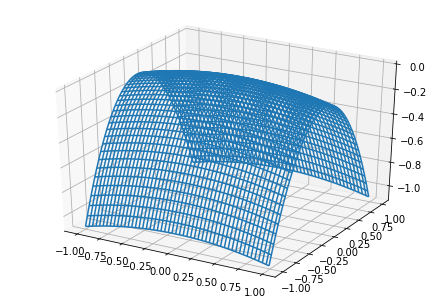

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z)

In [4]:
alpha = .1
niter = 50

In [5]:
x_history = []
f_steepest_history = []
x = np.array([-.95, -.95])
for t in range(niter):
    x_history.append(x)
    f_steepest_history.append(f(*x))
    x += alpha * g(*x)
    x = np.clip(x, [-1, -1], [1, 1])

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


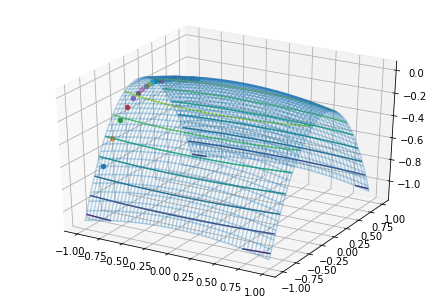

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, alpha=0.3)
ax.contour3D(X, Y, Z)
for x in x_history:
    ax.scatter3D(x[0], x[1], f(*x))
fig.show()

In [7]:
x_history = []
f_newton_history = []
x = np.array([-.95, -.95])

for t in range(niter):
    x_history.append(x)
    f_newton_history.append(f(*x))
    x -= alpha * g(*x) / h(*x)
    x = np.clip(x, [-1, -1], [1, 1])

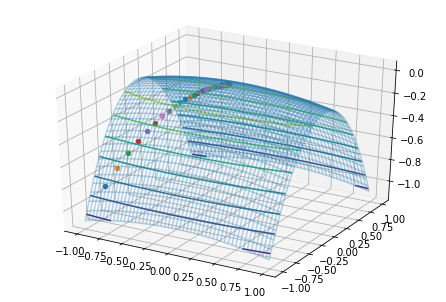

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, alpha=0.3)
ax.contour3D(X, Y, Z)
for x in x_history:
    ax.scatter3D(x[0], x[1], f(*x))

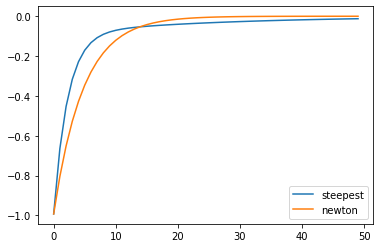

In [9]:
fig = plt.figure()
plt.plot(range(niter), f_steepest_history, label='steepest')
plt.plot(range(niter), f_newton_history, label='newton')
plt.legend()
fig.show()